## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("LoanStatus.csv")

In [3]:
#maximum, minimum and standard deviation values of the applicant's income
df["ApplicantIncome"].agg(["max", "min", "std"])

max    81000.000000
min      150.000000
std     6109.041673
Name: ApplicantIncome, dtype: float64

In [4]:
#count of null elements in each column 
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [5]:
#porobability of getting loan by status
probability = df["Loan_Status"].value_counts() / len(df)
print(f"probability to get loan {probability[0]}")

probability to get loan 0.6872964169381107


In [6]:
#probability of getting loan by good credit history
credit_history = df[df["Credit_History"] == 1]
credit_status = credit_history["Loan_Status"] == "Y"
print(f'probability with good credit history {credit_status.sum() / len(credit_history)}')

probability with good credit history 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings 
warnings.filterwarnings("ignore")

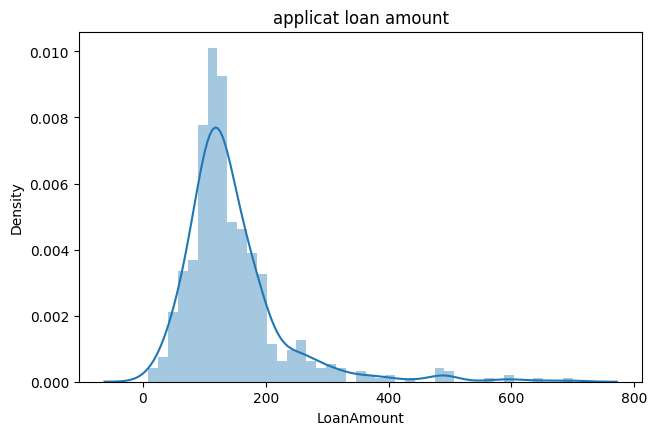

In [9]:
#visualizes the distribution of loan amounts, providing insights into their frequency and pattern
fig = plt.figure(figsize=(16, 10))

plt.subplot(221)
ax1 = sns.distplot(df["LoanAmount"])
plt.title(f"applicat loan amount")

plt.show()

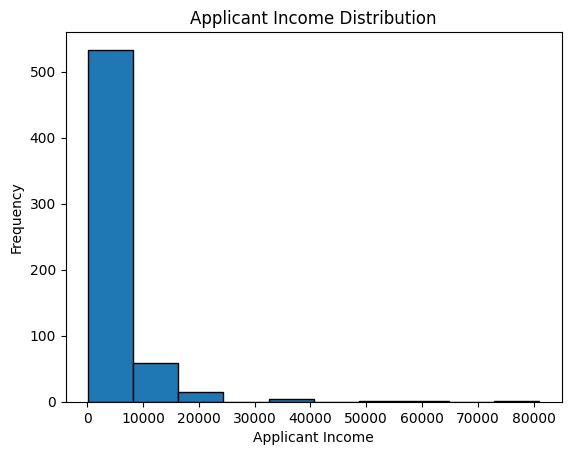

In [10]:
#histogram for applicant income
plt.hist(df['ApplicantIncome'], bins=10, edgecolor='k')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [11]:
from scipy.stats import norm

In [12]:
income = 2000
inc_mean = df["ApplicantIncome"].mean()
inc_std_dev = df["ApplicantIncome"].std()
inc_probability = norm.cdf(income, inc_mean, inc_std_dev)
print(f"percentage of applicants that have income less than 2000 eur is: {inc_probability}")

percentage of applicants that have income less than 2000 eur is: 0.28872328177095585


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

<Axes: xlabel='LoanAmount'>

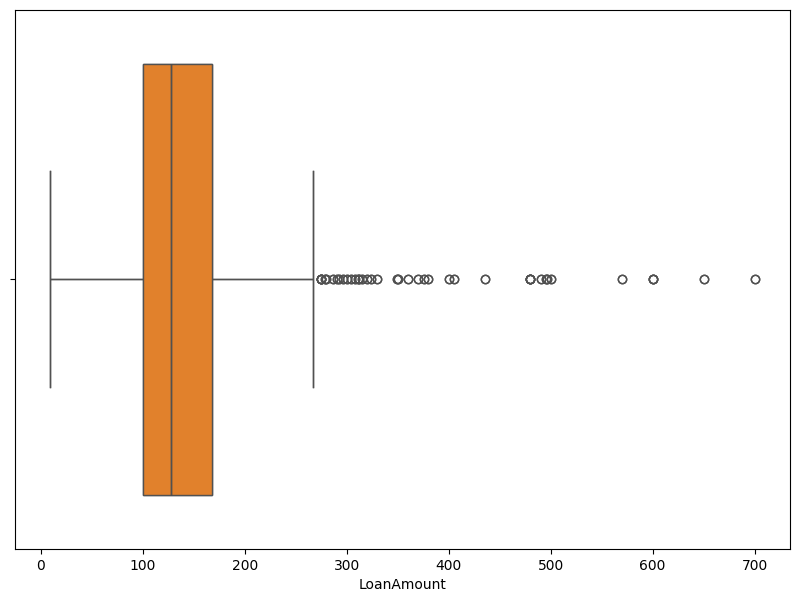

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))

sns.boxplot(x = df['LoanAmount'])
sns.boxplot(data=df, x="LoanAmount")

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [14]:
from scipy.stats import ttest_1samp,ttest_ind
import scipy.stats as stats

In [15]:
#one sample t-test
t_statistic, p_value = ttest_1samp(df["ApplicantIncome"], df["ApplicantIncome"].mean())
print(t_statistic, p_value)

0.0 1.0


In [16]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The two samples have significantly different means.")
else:
    print("Fail to reject the null hypothesis: The two samples do not have significantly different means.")

Fail to reject the null hypothesis: The two samples do not have significantly different means.


In [17]:
#two sample t-test
data2 = {
    'ApplicantIncome': [4500, 5500, 5000, 5500, 6000, 6500, 6000, 5000, 7000, 4800, 5200],
}

df2 = pd.DataFrame(data2)

In [18]:
t_statistic, p_value = stats.ttest_ind(a=df['ApplicantIncome'], b=df2['ApplicantIncome'], equal_var=True)
print(t_statistic, p_value)

-0.0770193691452273 0.9386328641472779


In [19]:
if p_value < alpha:
    print("Reject the null hypothesis: The two groups have significantly different means.", )
else:
    print("Fail to reject the null hypothesis: The two groups do not have significantly different means.")

Fail to reject the null hypothesis: The two groups do not have significantly different means.
